In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# 计算轮廓系数
import matplotlib.pyplot as plt

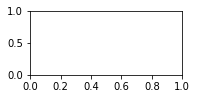

In [3]:
plt.subplot(3,2,1)
# 分割出3*2个子图，并且在1号子图上作图

In [5]:
# 初始化原始数据
x1=np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])
x2=np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3])
x=np.array(list(zip(x1,x2))).reshape(len(x1),2)
# 在这不能直接zip，要先list，因为Python升级后zip输出的不再是list，所以需要手动转换

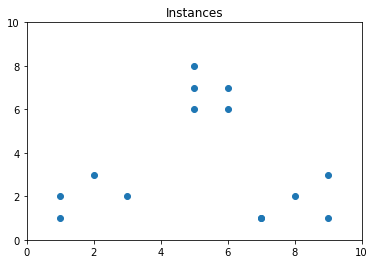

In [6]:
# 在一号子图上做出原始数据点阵的分布
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Instances')
plt.scatter(x1,x2)

In [7]:
colors=['b','g','r','c','m','y','k','b']
markers=['o','s','D','v','^','p','*','+']
# 这个是点的形状，一般默认是圆

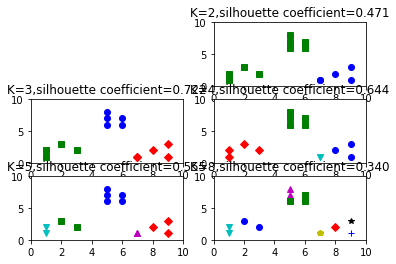

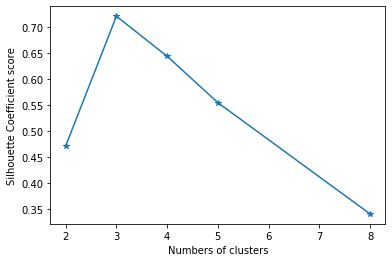

In [16]:
clusters=[2,3,4,5,8]
# 分成不同的簇开始画图了
subplot_counter=1
sc_scores=[]
for t in clusters:
    subplot_counter+=1
    plt.subplot(3,2,subplot_counter)
    kmeans_model=KMeans(n_clusters=t).fit(x)
    for i,l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i],x2[i],color=colors[l],marker=markers[l],ls='None')
        plt.xlim([0,10])
        plt.ylim([0,10])
    sc_score=silhouette_score(x,kmeans_model.labels_,metric='euclidean')
    sc_scores.append(sc_score)
    plt.title('K=%s,silhouette coefficient=%0.03f'%(t,sc_score))
#         绘制轮廓系数与不同类簇数量的直观显示图
plt.figure()
plt.plot(clusters,sc_scores,'*-')
plt.xlabel('Numbers of clusters')
plt.ylabel('Silhouette Coefficient score')
plt.show()
# 轮廓系数与不同类簇数量的关系曲线图
# 可以看到当聚类中心的数量为3时候，轮廓系数最大
# 可以看出来3的时候效果最好

In [17]:
# 现在用肘部观察法来观察平均距离和类簇数量的关系
from scipy.spatial.distance import cdist
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(5.5, 6.5, (2, 10))
cluster3 = np.random.uniform(3.0, 4.0, (2, 10))

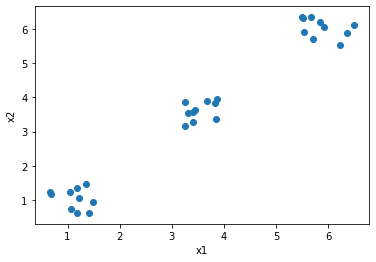

In [18]:
# 绘制30个数据样本的分布图像
X=np.hstack((cluster1, cluster2, cluster3)).T
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

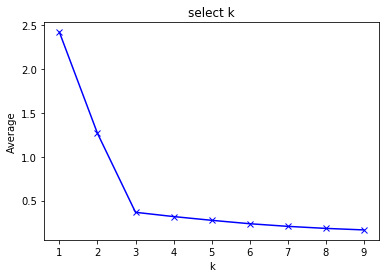

In [19]:
# 9种不同聚类中心数量下，每种情况的聚类质量
K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))/X.shape[0])
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average')
plt.title('select k')
plt.show()

In [ ]:
# 在这图可以看出来，当为三的时候，这个拐点最大，其他的效果都没这么好，所以选择三
